###Author : Mohamed Khalil
###Task 1 : Prediction using Supervised Machine Learning
###GRIP @ The Sparks Foundation

In this regression task I tried to predict the percentage of student marks  based upon the number of hours they studied.

This is  a simple liner regression task as it involves only 2 variables.



###**Technical Stack**

In [ ]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

###**Reading the data from the source**

In [ ]:
url = "http://bit.ly/w-data"
df = pd.read_csv(url)
print("Importing Data Successfully")

df.head()

Importing Data Successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


###**Input data Visualization**

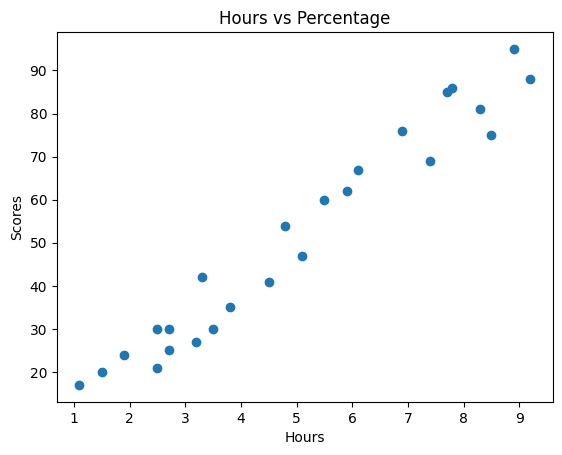

In [ ]:
# Plotting the distribution of scores
plt.scatter(df.Hours,df.Scores)
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.title("Hours vs Percentage")
plt.show()

**There is a clear positive correlation between hours and percentages.**

###**Data Preprocessing**

Dividing data into Features (inputs), Target (outputs) they also call it attributes and labels

In [ ]:
features = "Hours"
target = "Scores"
y= df[target]
X= df[features].to_frame()


### **Model Training**

Vertical splite in this step we Splitting the data into training and testing sets, for training the algorithm.

In [ ]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                            test_size=0.2, random_state=0)


###Baseliene

In [ ]:
y_mean = y_train.mean()
y_pred_baseline = [y_mean] * len(y_train)

In [ ]:
mae_baseline = mean_absolute_error(y_train, y_pred_baseline)
print("Mean Scores: ", y_mean)
print("Baseline MAE: " , mae_baseline)

Mean Scores:  53.95
Baseline MAE:  22.75


###Iterate

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)
print("Training complete.")

Training complete.


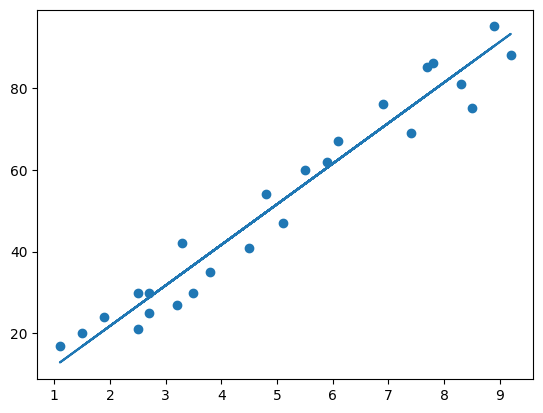

In [ ]:
# Plotting the regression line
line = model.coef_ * X + model.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

### **Making Predictions** ###


In [ ]:
hours = 9.25
own_pred = model.predict([[hours]])
print("No of Hours:{} ".format(hours))
print("Predected Score: {}".format(own_pred[0].round(2)) )

No of Hours:9.25 
Predected Score: 93.69


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


### **Evaluating The Modle** ###
The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean absolute error. There are many such metrics.

In [ ]:
training_mae = mean_absolute_error(y_train, model.predict(X_train) )
test_mae = mean_absolute_error(y_test, model.predict(X_test))
print("Training MAE: ", training_mae)
print("Testing MAE: ", test_mae)
print("Baslien MSR: ", mean_squared_error(y_test, model.predict(X_test)))

Training MAE:  5.186601709180373
Testing MAE:  4.183859899002982
Baslien MSR:  21.598769307217456
